# Fetching DataSet


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x, y = np.array(x.iloc[:]), np.array(y.iloc[:])
x.shape


(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

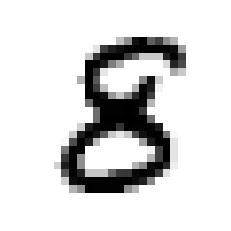

In [7]:
import matplotlib
import matplotlib.pyplot as plt
some_digits = x[3601]
some_digit_image = some_digits.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')

In [8]:
y[3601]

'8'

In [9]:
x_train, x_test = x[:6000], x[6000:7000]

In [10]:
y_train, y_test = y[:6000], y[6000:7000]

In [11]:
import numpy as np
shuffled_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffled_index], y_train[shuffled_index]

## Creating a 2 detector

In [12]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)
# y_train_2

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
clf = LogisticRegression(tol=0.1,max_iter=60000)
clf.fit(x_train, y_train_2)

LogisticRegression(max_iter=60000, tol=0.1)

In [15]:
clf.predict([some_digits])

array([False])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train_2, cv = 3, scoring = 'accuracy').mean()

0.9563333333333333

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, x_train, y_train_2, cv = 3)

In [18]:
y_train_predict

array([False, False, False, ..., False, False, False])

## Calculating Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2,y_train_predict)

array([[5273,  146],
       [ 116,  465]], dtype=int64)

In [21]:
confusion_matrix(y_train_2,y_train_2)#perfect model/classifier's confusion matric

array([[5419,    0],
       [   0,  581]], dtype=int64)

## Calculating precision , recall , f1 score


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_2, y_train_predict)

0.7610474631751227

In [23]:
recall_score(y_train_2, y_train_predict)

0.8003442340791739

In [25]:
f1_score(y_train_2,y_train_predict)

0.7802013422818792

##  Precision recall curve

In [32]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv = 3, method = 'decision_function')

In [33]:
from sklearn.metrics import precision_recall_curve
precion, recall, threshold = precision_recall_curve(y_train_2, y_scores)

In [34]:
precion

array([0.10987141, 0.10970305, 0.1097238 , ..., 1.        , 1.        ,
       1.        ])

In [35]:
recall

array([1.        , 0.99827883, 0.99827883, ..., 0.00344234, 0.00172117,
       0.        ])

In [36]:
threshold


array([-115.04585113, -114.89856737, -114.8295167 , ...,  112.61172887,
        121.26415796,  126.40525558])

## plotting

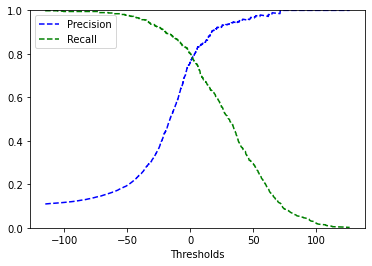

In [38]:
plt.plot(threshold,precion[:-1],"b--",label = "Precision")
plt.plot(threshold,recall[:-1],"g--",label = "Recall")
plt.xlabel("Thresholds")
plt.legend(loc= 'upper left')
plt.ylim([0,1])
plt.show()